### 1. Install the necessary libraries from this Exercise’s requirements.txt file in your corresponding virtual environment.

In [18]:
# Import Required Libraries

import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

### 2. Import the country relationships file (that you created in the previous task) as a dataframe in a new notebook.

In [19]:
# Import Countries Relationships Csv File

countries_relationships = pd.read_csv('20th_century_relationships.csv')

### 3. Create a network object from the countries relationships dataframe.

In [20]:
# Build an undirected NetworkX graph from the source target relationship pairs

G = nx.from_pandas_edgelist(countries_relationships, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

### 4. Create a static network graph using only NetworkX.

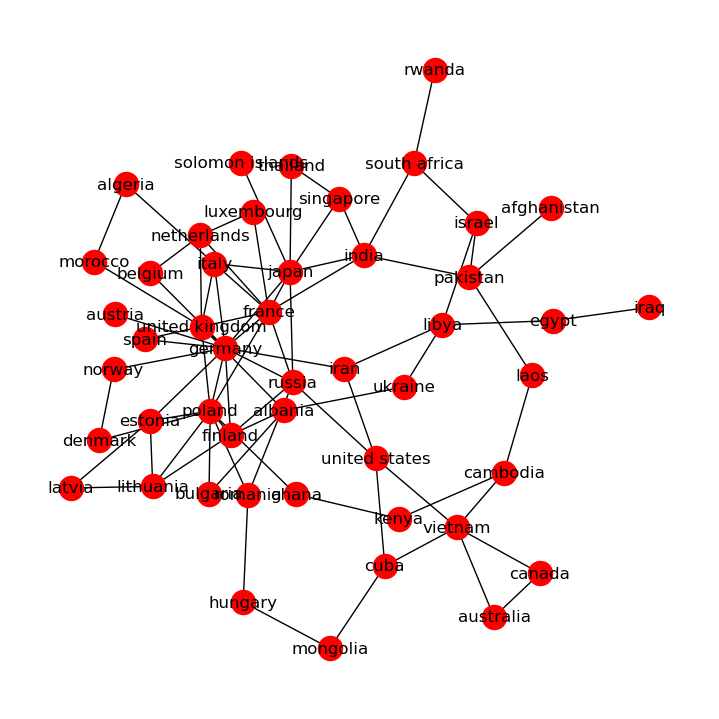

In [21]:
# Draw the network graph using a Kamada Kawai layout for clear spacing

h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show()

In [22]:
# Save the plotted network graph to a PNG file

h.savefig('networkx_countries.png')

### 5. Switch to pyvis, build an interactive network graph from your network object, and save it as an HTML file.

In [23]:
# Initialize an interactive PyVis network with custom size and styling

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [24]:
# Compute each node’s degree (number of connections) in the graph

node_degree = dict(G.degree)

In [25]:
# Load graph into PyVis, apply node sizes, enable controls, and export the interactive HTML

nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("20th_century_countries.html")

### 6. Apply the Leiden algorithm to detect any communities within the countries.

In [26]:
# Detect communities in the graph using the Leiden algorithm

from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'bayanpy', 'wurlitzer', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [27]:
# Check the type of the community detection result object

type(coms)

cdlib.classes.node_clustering.NodeClustering

In [28]:
# Convert Leiden communities into a node community lookup dictionary

new_com = coms.to_node_community_map()
new_com

defaultdict(list,
            {'germany': [0],
             'france': [0],
             'united kingdom': [0],
             'italy': [0],
             'austria': [0],
             'luxembourg': [0],
             'netherlands': [0],
             'algeria': [0],
             'morocco': [0],
             'belgium': [0],
             'spain': [0],
             'russia': [1],
             'united states': [1],
             'vietnam': [1],
             'cuba': [1],
             'romania': [1],
             'hungary': [1],
             'mongolia': [1],
             'australia': [1],
             'canada': [1],
             'poland': [2],
             'finland': [2],
             'denmark': [2],
             'estonia': [2],
             'latvia': [2],
             'lithuania': [2],
             'norway': [2],
             'bulgaria': [2],
             'albania': [2],
             'egypt': [3],
             'libya': [3],
             'israel': [3],
             'south africa': [3],
            

In [29]:
# Flatten community lists so each node maps to a single community ID

dict_com = {k:v[0] for k, v in new_com.items()}
dict_com

{'germany': 0,
 'france': 0,
 'united kingdom': 0,
 'italy': 0,
 'austria': 0,
 'luxembourg': 0,
 'netherlands': 0,
 'algeria': 0,
 'morocco': 0,
 'belgium': 0,
 'spain': 0,
 'russia': 1,
 'united states': 1,
 'vietnam': 1,
 'cuba': 1,
 'romania': 1,
 'hungary': 1,
 'mongolia': 1,
 'australia': 1,
 'canada': 1,
 'poland': 2,
 'finland': 2,
 'denmark': 2,
 'estonia': 2,
 'latvia': 2,
 'lithuania': 2,
 'norway': 2,
 'bulgaria': 2,
 'albania': 2,
 'egypt': 3,
 'libya': 3,
 'israel': 3,
 'south africa': 3,
 'iran': 3,
 'iraq': 3,
 'rwanda': 3,
 'ukraine': 3,
 'pakistan': 4,
 'cambodia': 4,
 'afghanistan': 4,
 'ghana': 4,
 'kenya': 4,
 'laos': 4,
 'japan': 5,
 'india': 5,
 'solomon islands': 5,
 'singapore': 5,
 'thailand': 5}

### 7. Visualize the output of the communities algorithm on a new network graph and save it as HTML. Write your observations in a Markdown cell.
### Does the partition make sense according to history?
### What other conclusions can you make about the connections between the communities?

In [30]:
# Add community labels to nodes, build a PyVis network, and export the interactive community graph

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("countries_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


#### This is indeed very interesting, i can see very clearly the communities relationships and it is very insightful. The partition does totally make sense according to History.
#### First of all i can recognize the main countries of 20th Century Key Events, i can see allied countries during World War II and how they were connected to each others, also by degree of importance.
#### Germany and Italy were major allies, along wih Japan, but if we see closely we can also notice Japan regional main countries that somehow where or are connected, and by having a different color we can assume it can be related but not in the same way it was related the relationship between Germany and Italy.
#### We can also see the Eastern Europe Countries and the degree/importance of connections in Yellow, with Poland being a major point of interest (as it was indeed at the beginning of the war).
#### United States is not shown with a major focus as other countries in Europe during World War II, but the graph shows more their alliances during the War and also Countries that had a connection related to Crisis or Wars (in this case Cuba and Vietnam).

### 8. Calculate and visualize the degree, closeness, and betweenness centrality measures covered in this Exercise. In the markdown cells underneath, note your observations about the outputs.

In [31]:
# Calculate and return degree centrality for all nodes in the graph

degree_dict = nx.degree_centrality(G)
degree_dict

{'germany': 0.2765957446808511,
 'poland': 0.2127659574468085,
 'japan': 0.1702127659574468,
 'france': 0.19148936170212766,
 'united kingdom': 0.1702127659574468,
 'italy': 0.10638297872340426,
 'russia': 0.1276595744680851,
 'india': 0.10638297872340426,
 'pakistan': 0.0851063829787234,
 'egypt': 0.0425531914893617,
 'libya': 0.0851063829787234,
 'israel': 0.06382978723404255,
 'south africa': 0.06382978723404255,
 'solomon islands': 0.02127659574468085,
 'austria': 0.02127659574468085,
 'united states': 0.0851063829787234,
 'vietnam': 0.10638297872340426,
 'iran': 0.06382978723404255,
 'cuba': 0.06382978723404255,
 'cambodia': 0.06382978723404255,
 'afghanistan': 0.02127659574468085,
 'romania': 0.06382978723404255,
 'finland': 0.10638297872340426,
 'denmark': 0.0425531914893617,
 'estonia': 0.0851063829787234,
 'latvia': 0.0425531914893617,
 'lithuania': 0.0851063829787234,
 'norway': 0.0425531914893617,
 'luxembourg': 0.0425531914893617,
 'netherlands': 0.0851063829787234,
 'alger

In [32]:
# Convert the degree centrality dictionary into a DataFrame for analysis

degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [33]:
# Sort countries by highest to lowest centrality

degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

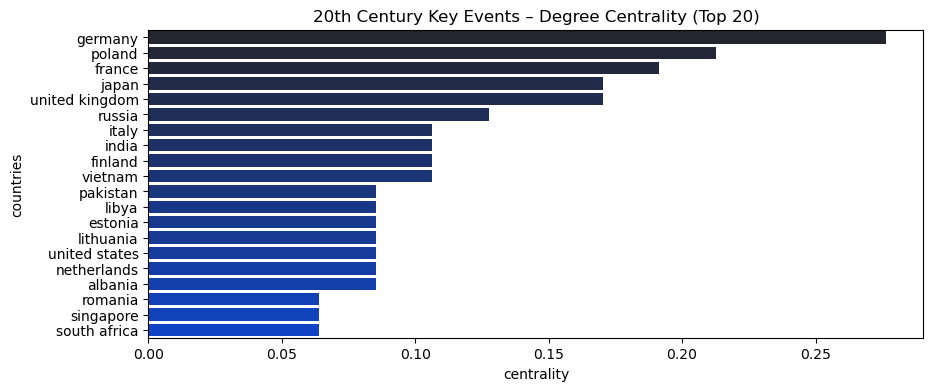

In [34]:
# Plot the degree centrality chart (Only Top 20 Countries)

plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(
        x = "centrality",
        y = "countries",
        data = degree_df.head(20),
        saturation = 0.9
    ).set_title("20th Century Key Events – Degree Centrality (Top 20)")

#### The degree centrality chart shows the countries that are most directly connected to others in the 20th century events text.
#### A higher value means that a country appears together with more countries in the same context.
#### Germany has the highest centrality, which makes sense historically because it appears in almost all major 20th century conflicts and political events (WWI, WWII, Cold War transitions).
#### Poland, France, Russia, Japan, and the United Kingdom also show high centrality because they were involved in events that linked them with multiple countries.
#### Countries such as India, Pakistan, Libya, and Israel appear in regional conflicts and independence movements, giving them medium level centrality.
#### Overall, the chart reflects major historical alliances, wars, colonial relationships, and geopolitical interactions across the 20th century.

In [35]:
# Compute closeness centrality and convert results into a DataFrame

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [36]:
# Sort countries by closeness centrality in descending order

closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

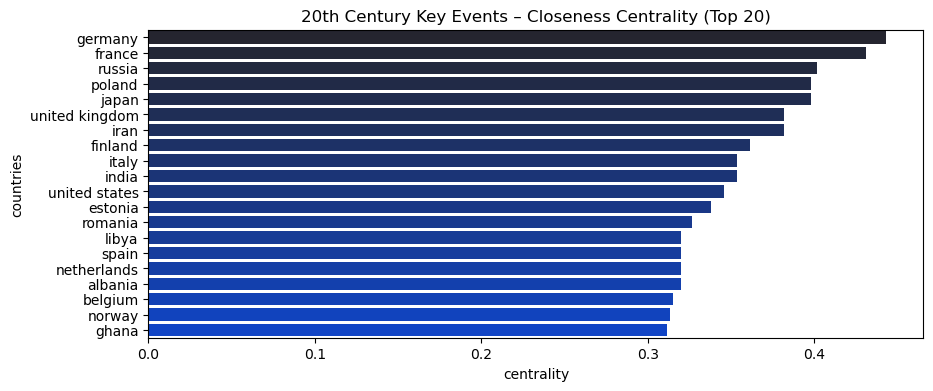

In [37]:
# Plot the top 20 countries ranked by closeness centrality

plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(
        x = "centrality",
        y = "countries",
        data = closeness_df.head(20),
        saturation = 0.9
    ).set_title("20th Century Key Events – Closeness Centrality (Top 20)")

#### The closeness centrality results show which countries sit in the “middle” of the network and can reach others the fastest.
#### Germany, France, Russia, Japan and the UK are at the top, which makes sense because they were involved in many major events and connected to different regions.
#### Countries like India, Finland, Italy and the US are still important but not as central.
#### Overall, the chart highlights which countries were most connected across different historical moments in the 20th century.

In [38]:
# Compute betweenness centrality and store results in a DataFrame

betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [39]:
# Sort countries by betweenness centrality in descending order

betweenness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

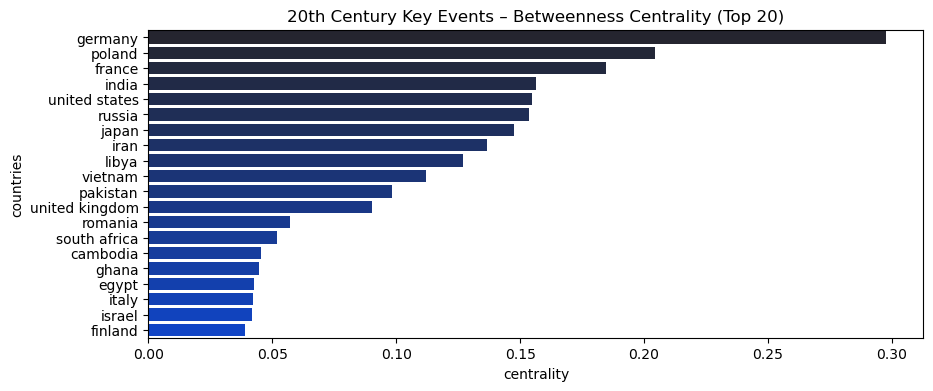

In [40]:
# Plot the top 20 countries ranked by betweenness centrality

plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(
        x = "centrality",
        y = "countries",
        data = betweenness_df.head(20),   # <--- ONLY TOP 20
        saturation = 0.9
    ).set_title("20th Century Key Events – Betweenness Centrality (Top 20)")

#### The betweenness centrality chart shows which countries acted as “bridges” between others in the network.
#### Germany is clearly the biggest connector, linking many different groups.
#### France, India, the U.K., and the United States also play strong bridging roles, meaning they often sit on the shortest paths between other countries.
#### Countries lower on the list, like Ghana or Cambodia, still appear but are less central in connecting major regions.
#### Overall, this measure highlights which countries played key roles in linking different historical events together.